# A closer look at the 32 column runs

As in notebook 1.0 we will check out the 32 column runs, comparing the network trained with 36 days and one year of data.

`001_32cols_engy_ess_3d_pnas` is a network trained with the first 3 days from each month of the first year = 36 days. The configuration is the same as in the PNAS paper.
`002_32cols_engy_ess_1y_pnas` is the same network but trained with an entire year of data.

In [2]:
import xarray as xr
from cbrain.model_diagnostics import *
from cbrain.utils import *
limit_mem()

## Offline validation of trained neural networks

First we want to see how well the networks perform offline on the validation dataset.

In [5]:
# LMU
MODEL_DIR = '/home/s/S.Rasp/repositories/CBRAIN-CAM/saved_models/'
PREPROC_DIR = '/local/S.Rasp/preprocessed_data/'

In [6]:
# Create a ModelDiagnostics object
norms = ('feature_means', 'max_rs', None, 'target_conv')

diag_3d = ModelDiagnostics(
    MODEL_DIR + '001_32cols_engy_ess_3d_pnas.h5',
    fpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_features.nc',
    tpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_targets.nc',
    npath=PREPROC_DIR + '32_col_engy_ess_3d_train_norm.nc',
    norms=norms,
)

In [8]:
diag_3d.compute_stats()

100%|██████████| 429/429 [00:08<00:00, 50.23it/s]
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [9]:
diag_1y = ModelDiagnostics(
    MODEL_DIR + '002_32cols_engy_ess_1y_pnas.h5',
    fpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_features.nc',
    tpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_targets.nc',
    npath=PREPROC_DIR + '32_col_engy_ess_3d_train_norm.nc',
    norms=norms,
)

In [10]:
diag_1y.compute_stats()

100%|██████████| 429/429 [00:07<00:00, 55.16it/s]
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [11]:
diag_3d.mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-2.59226e-07,7.62447e-10,-4.52999e-07,-1.93773e-07,9.69937e-10,1.73256e-09,7.81657e-10,1.52444e-09,0.386423,1.73256e-09,-1.93773e-07,7.62447e-10,1.71837e-09,0.534065
PHQ,1.25964e-10,5.97418e-16,9.77456e-10,8.51492e-10,2.97658e-16,8.8766e-16,2.37644e-16,8.26081e-16,-47.0462,8.8766e-16,8.51492e-10,5.97418e-16,8.80542e-16,0.442628
FSNT,0.368462,433.92,226.755,226.386,154751,154664,82903.2,83054.7,-inf,154664,226.386,433.92,103413,0.995804
FSNS,0.309971,524.81,159.075,158.765,84701.2,84896.3,48186.7,48508.9,-inf,84896.3,158.765,524.81,59689.9,0.991208
FLNT,0.0225993,121.525,224.983,224.96,52258.1,52355.7,788.965,883.801,0.7684,52355.7,224.96,121.525,1748.6,0.930502
FLNS,-0.0181243,52.3975,49.6453,49.6634,3194.82,3238.66,466.384,503.43,0.832758,3238.66,49.6634,52.3975,772.205,0.932146
PRECT,-6.77476e-10,1.94328e-15,2.97253e-08,3.04028e-08,6.351e-15,8.51124e-15,4.1856e-15,6.17133e-15,0.469577,8.51124e-15,3.04028e-08,1.94328e-15,7.58691e-15,0.743864
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795745


In [12]:
diag_1y.mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-7.29432e-08,6.85512e-10,-2.66716e-07,-1.93773e-07,1.03888e-09,1.73256e-09,8.44837e-10,1.52444e-09,0.471343,1.73256e-09,-1.93773e-07,6.85512e-10,1.71837e-09,0.582294
PHQ,4.8604e-11,5.723e-16,9.00096e-10,8.51492e-10,3.16266e-16,8.8766e-16,2.56592e-16,8.26081e-16,-25.4494,8.8766e-16,8.51492e-10,5.723e-16,8.80542e-16,0.474101
FSNT,0.0213465,345.433,226.407,226.386,154310,154664,82698.7,83054.7,-inf,154664,226.386,345.433,103413,0.99666
FSNS,-0.00224893,427.495,158.763,158.765,84419.5,84896.3,48044,48508.9,-inf,84896.3,158.765,427.495,59689.9,0.992838
FLNT,-0.243302,82.4693,224.717,224.96,52178,52355.7,813.341,883.801,0.847155,52355.7,224.96,82.4693,1748.6,0.952837
FLNS,-0.122868,38.6355,49.5405,49.6634,3187,3238.66,469.581,503.43,0.875115,3238.66,49.6634,38.6355,772.205,0.949967
PRECT,-2.26992e-10,1.72686e-15,3.01758e-08,3.04028e-08,6.66501e-15,8.51124e-15,4.43413e-15,6.17133e-15,0.546326,8.51124e-15,3.04028e-08,1.72686e-15,7.58691e-15,0.772389
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817298


Looking at the `hor_r2` score, the 1y version has better scores for all variables. The differences for the "important" variables, `TPHYSTND` and `PHQ` are definitely significant. So from this analysis we "could" conclude that training with one year of data gives a "better" network. 

Looking at `pred_var` we can also see that the variance of the 1y network is larger. Make of that what you will.

To confirm this visually we can also look at some heating snapshots.

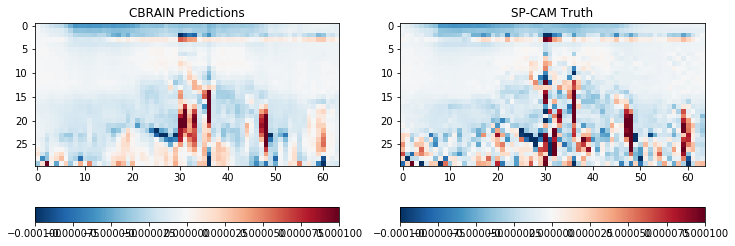

In [14]:
diag_3d.plot_double_yz(itime=0, ilon=3, var='TPHYSTND', vmin=-1e-4, vmax=1e-4, cmap='RdBu_r');

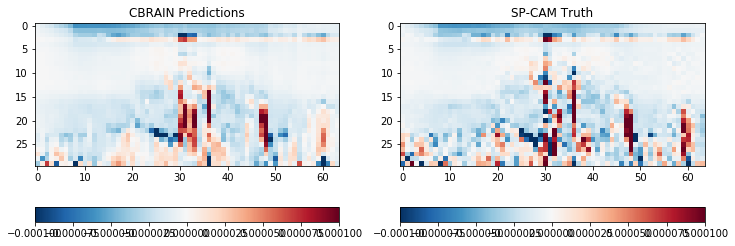

In [15]:
diag_1y.plot_double_yz(itime=0, ilon=3, var='TPHYSTND', vmin=-1e-4, vmax=1e-4, cmap='RdBu_r');

Check a slice for PHQ as well.

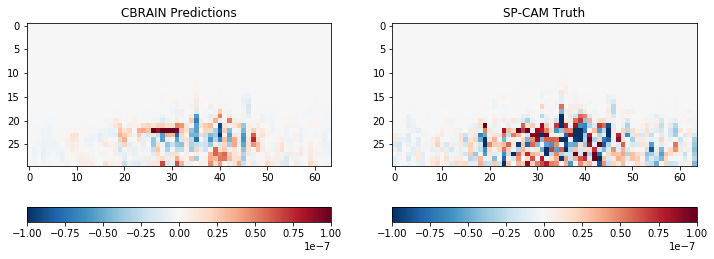

In [18]:
diag_3d.plot_double_yz(itime=0, ilon=20, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='RdBu_r');

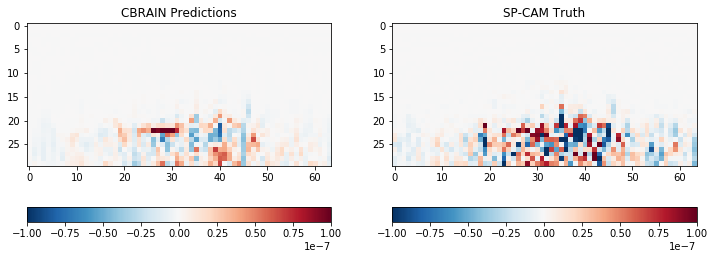

In [19]:
diag_1y.plot_double_yz(itime=0, ilon=20, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='RdBu_r');

## Analyzing the online runs

Here is the surprise!

- The 36 day run did NOT crash and ran until my interactive session ran out at 1 year and 4 month runtime
- The 1 year run crashed almost immediately!

In [12]:
import xarray as xr
import matplotlib.pyplot as plt

In [6]:
def gw_avg(ds, var=None, da=None):
    """Computes the area weighted mean over lat-lon"""
    da = ds[var] if da is None else da
    return (da * ds['gw']).sum('lat').mean('lon') / 2.

In [3]:
# Stampede
RUN_DIR = '/scratch/05488/tg847872/'
REF_DIR = '/work/05488/tg847872/stampede2/sp32fbp_andkua/'

### 3d = 36 day training simulation

Basically just a copy of notebook 1.0.

In [10]:
h0s_3d = xr.open_mfdataset(RUN_DIR + 'nncam_001_32cols_engy_ess_3d_pnas/*h0*', decode_times=False,
                          concat_dim='time')

In [5]:
h0s_ref = xr.open_mfdataset(REF_DIR + '*h0*', decode_times=False, concat_dim='time')

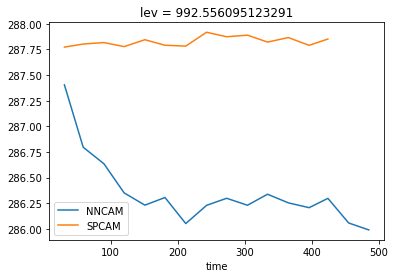

In [13]:
# Mean surface temperature drift
gw_avg(h0s_3d.isel(lev=29), 'TAP').plot(label='NNCAM')
gw_avg(h0s_ref.isel(lev=29), 'TAP').plot(label='SPCAM')
plt.legend();

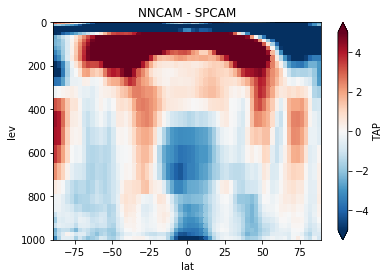

In [14]:
# Temperature difference for month 12
(h0s_3d.TAP.isel(time=11).mean(dim='lon') - h0s_ref.TAP.isel(time=11).
 mean(dim='lon')).plot(yincrease=False, vmin=-5, vmax=5, cmap='RdBu_r')
plt.title('NNCAM - SPCAM');

So as we already concluded in 1.0, it does not crash but has severe biases.

### 1 year simulation

This simulation crashes after 31 time steps. Because the crash occurs in the middle of amodel time step, the output file that's currently open is corrupted. For this reason I changed the output frequency to 30 time steps.

The output of the crash looks something like this:
```
...
 QNEG3 from cloudbrain/Q:m=  1 lat/lchnk=*** Min. mixing ratio violated at    2 points.  Reset to  1.0E-12 Worst =-4.5E-06 at i,k=   2 16
 QNEG3 from cloudbrain/Q:m=  1 lat/lchnk=*** Min. mixing ratio violated at    2 points.  Reset to  1.0E-12 Worst =-6.9E-07 at i,k=   6 15
 QNEG3 from cloudbrain/Q:m=  1 lat/lchnk=*** Min. mixing ratio violated at    1 points.  Reset to  1.0E-12 Worst =-1.6E-06 at i,k=   6 15
 NSTEP =      31   7.769810141476092E-06  2.517487641503117E+02  9.84775E+04  2.604772079572630E+01 2.89  0.74
 SR: beta =                      NaN
 SR: residual =                      NaN
 SR: fixmas =                      NaN
 SR: engy1 =                      NaN
 SR: engy2 =                      NaN
 SR: difft =                      NaN
```

In [93]:
%cd $RUN_DIR/nncam_002_32cols_engy_ess_1y_pnas

/scratch/05488/tg847872/nncam_002_32cols_engy_ess_1y_pnas


In [94]:
!ls

atm_in
cam
keras_matrices
nn_002_32cols_engy_ess_1y_pnas.cam2.h1.0000-01-01-00000.nc
nn_002_32cols_engy_ess_1y_pnas.cam2.h1.0000-01-01-54000.nc
nn_002_32cols_engy_ess_1y_pnas.cam2.h2.0000-01-01-00000.nc
nn_002_32cols_engy_ess_1y_pnas.cam2.h2.0000-01-01-54000.nc
out.txt
run.slurm
spinup_AndKua_aqua_SPCAM3.0.cam2.i.0000-12-02-00000.nc


In [95]:
h1 = xr.open_mfdataset('nn_002_32cols_engy_ess_1y_pnas.cam2.h1.0000-01-01-00000.nc',
                     decode_times=False)

Let's see where the crash occurs.

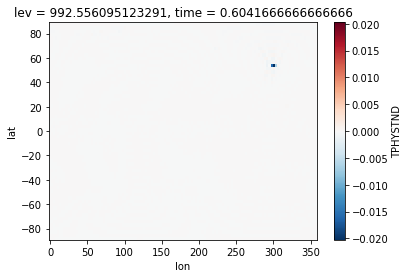

In [92]:
h1.TPHYSTND.isel(time=-1, lev=29).plot()

In [103]:
h1.TPHYSTND.isel(time=-1, lev=29).max(dim='lat').argmax(dim='lon').load(), \
h1.TPHYSTND.isel(time=-1, lev=29).max(dim='lon').argmax(dim='lat').load()

(<xarray.DataArray 'TPHYSTND' ()>
 array(107)
 Coordinates:
     lev      float64 992.6
     time     float64 0.6042, <xarray.DataArray 'TPHYSTND' ()>
 array(50)
 Coordinates:
     lev      float64 992.6
     time     float64 0.6042)

In [122]:
crashlat = 51; crashlon = 107

This gives us the opportunity to investigate one of these crashes in more detail.

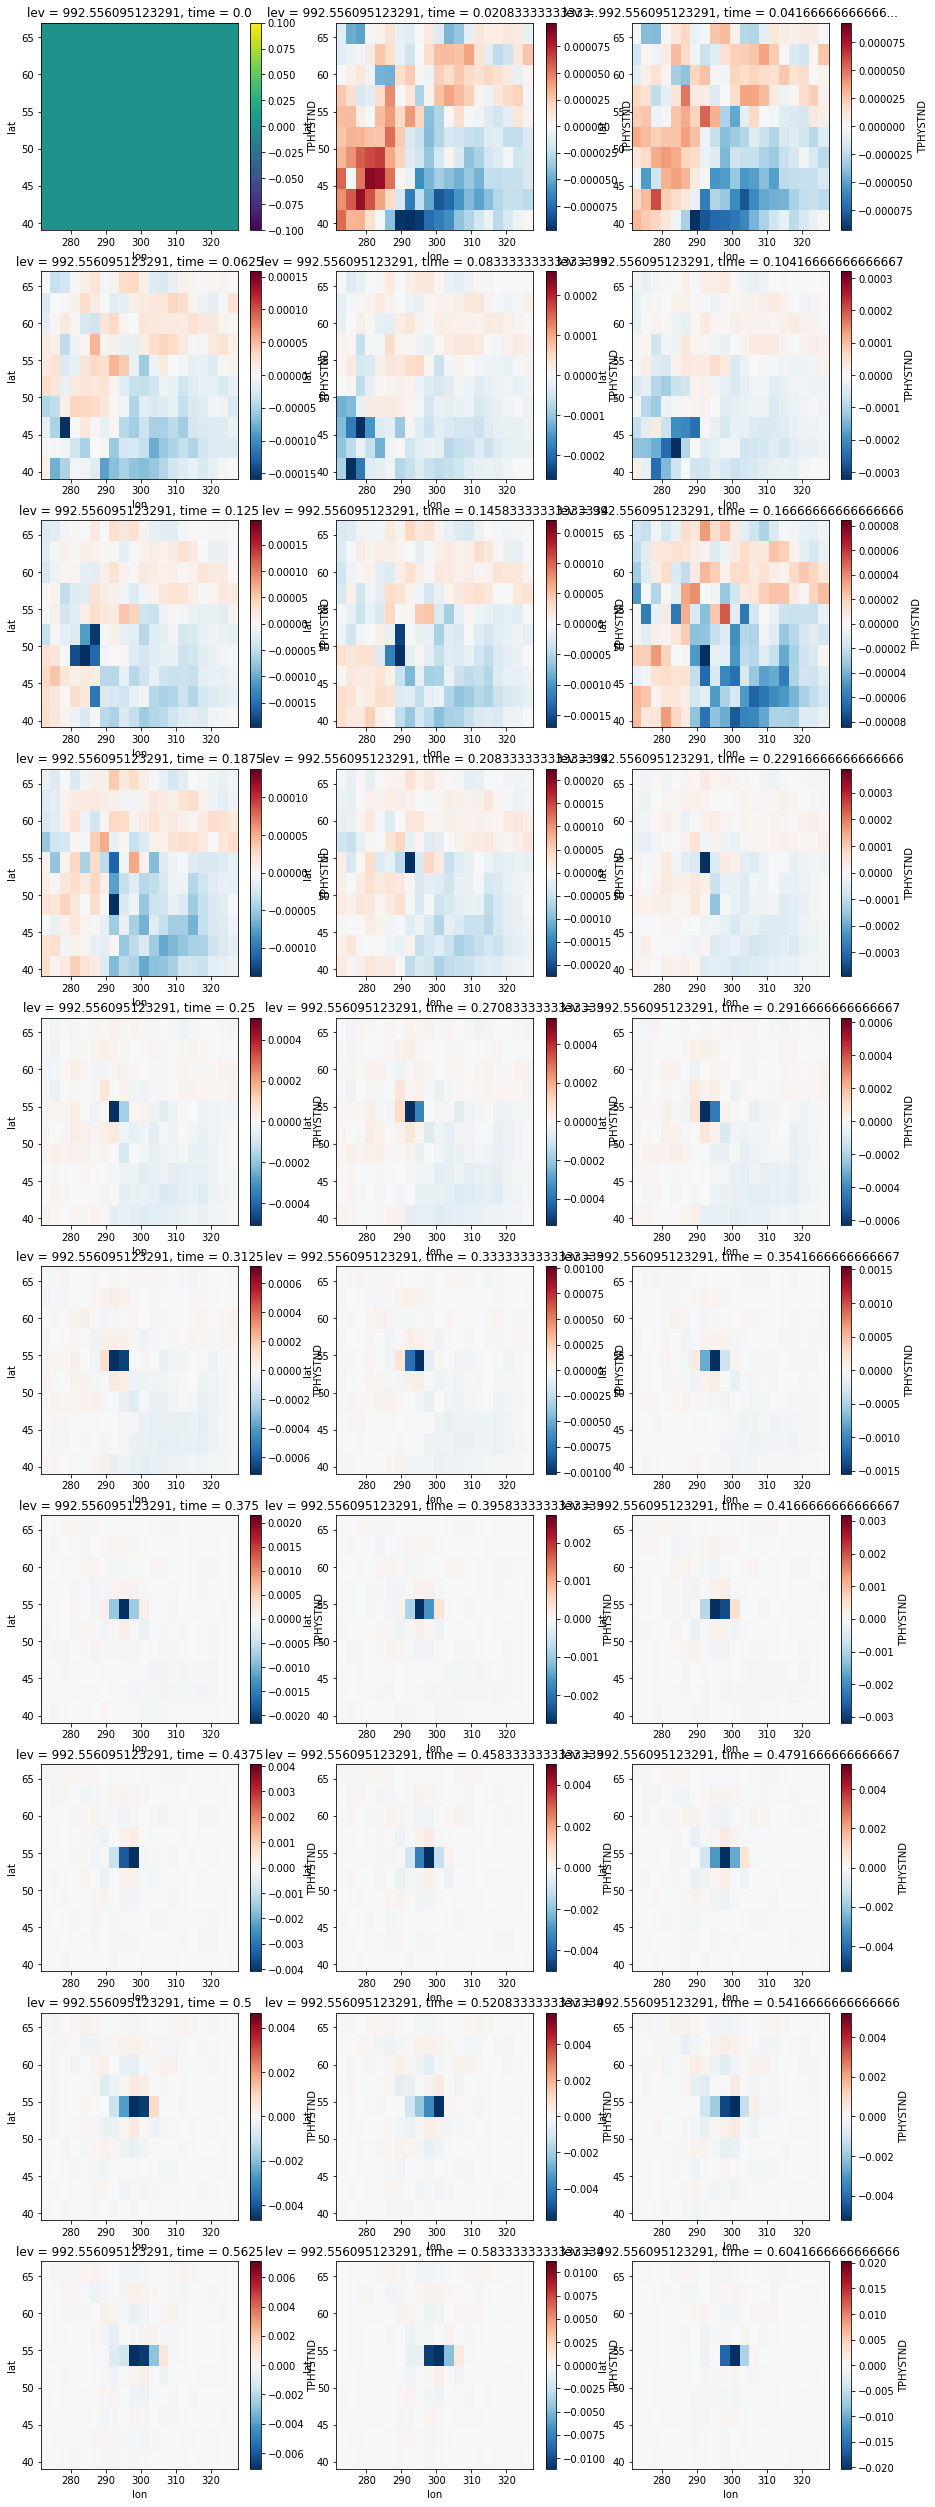

In [123]:
fig, ax = plt.subplots(10, 3, figsize=(15,45))
for t in range(30):
    h1.TPHYSTND.isel(
        time=t, lev=29, lat=slice(crashlat-5, crashlat+5), lon=slice(crashlon-10, crashlon+10)).plot(ax=ax.flat[t])

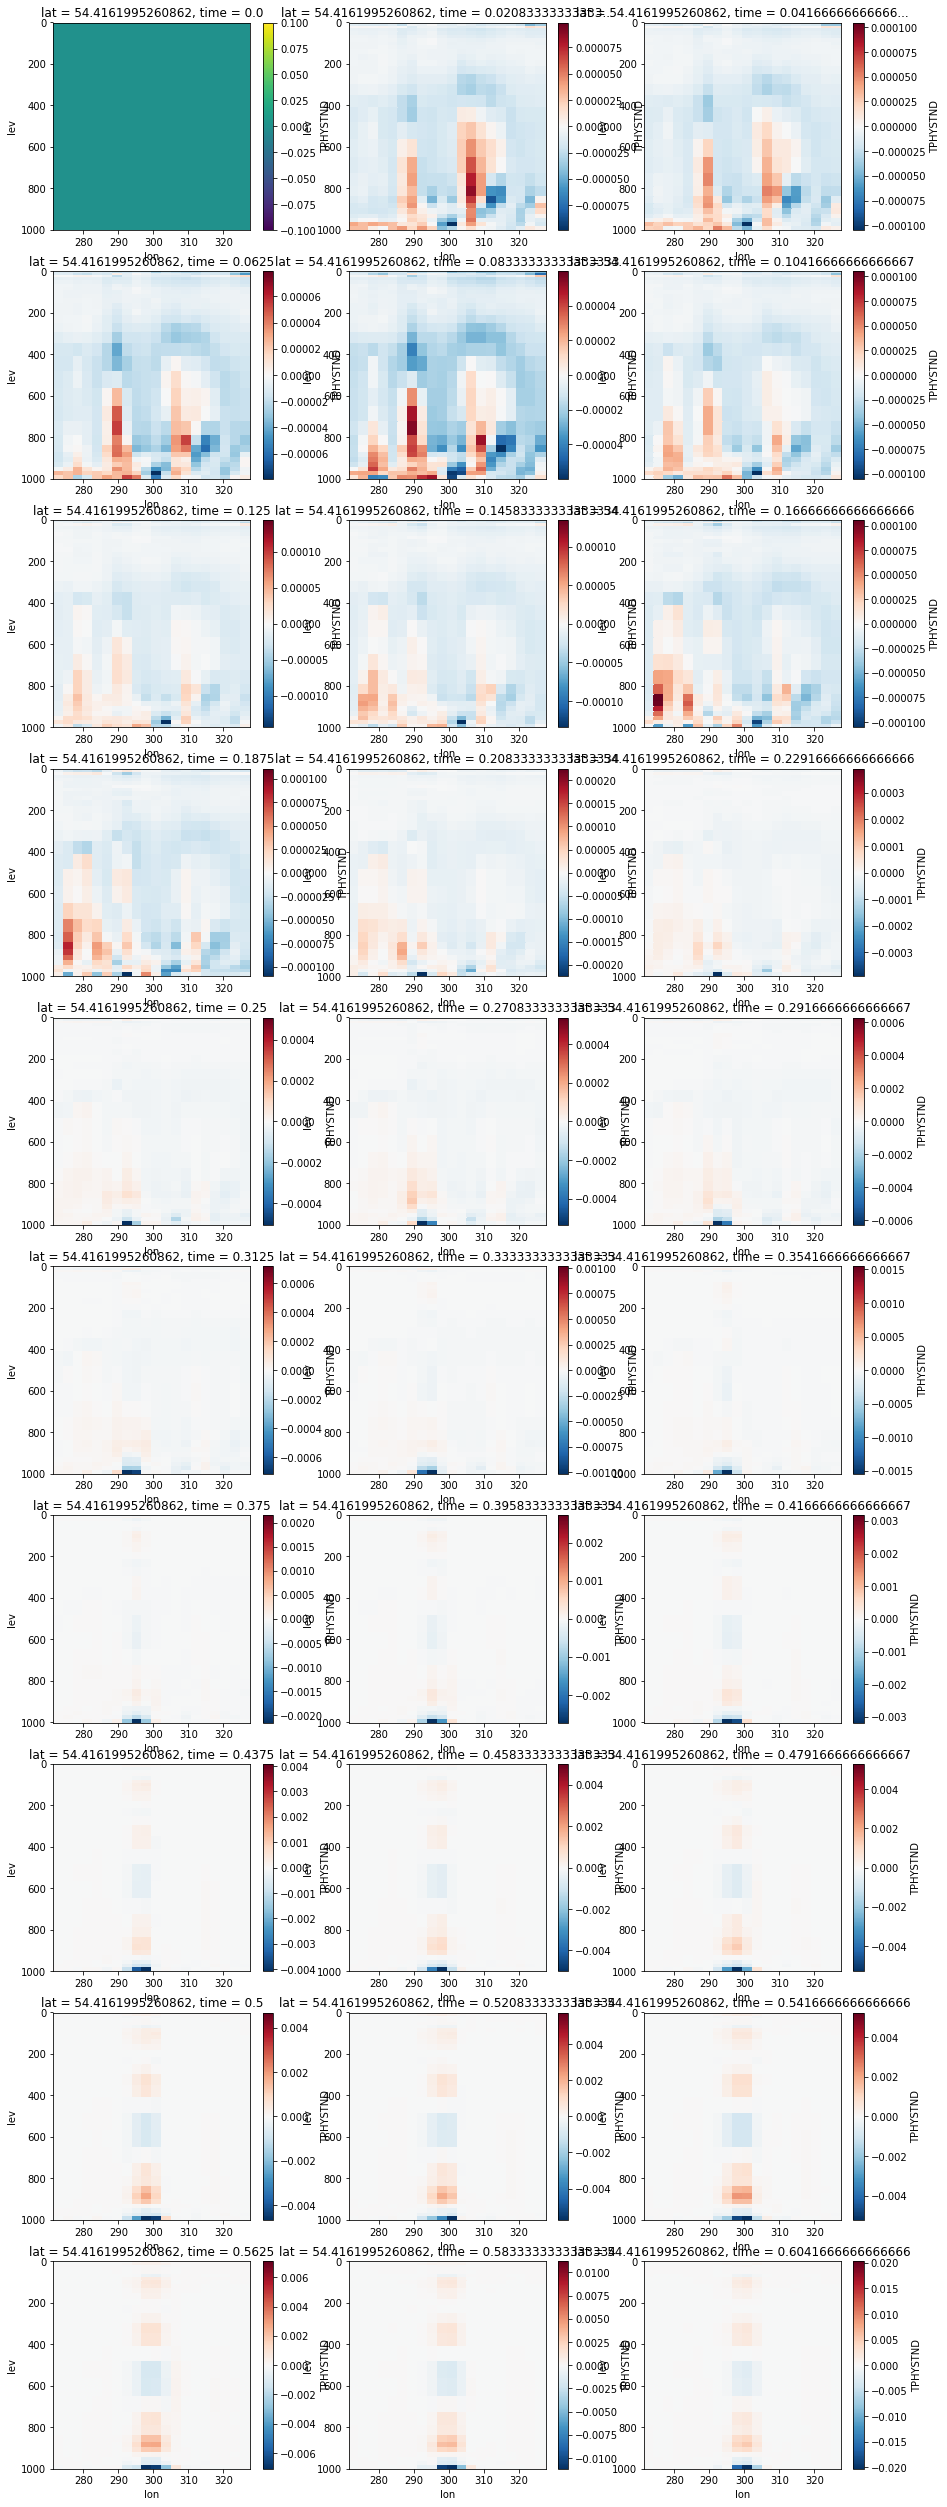

In [126]:
fig, ax = plt.subplots(10, 3, figsize=(15,45))
for t in range(30):
    h1.TPHYSTND.isel(
        time=t, lat=crashlat, lon=slice(crashlon-10, crashlon+10)).plot(ax=ax.flat[t], yincrease=False)

Now we can look whether we can see anything unusual in the inputs to the first time step.

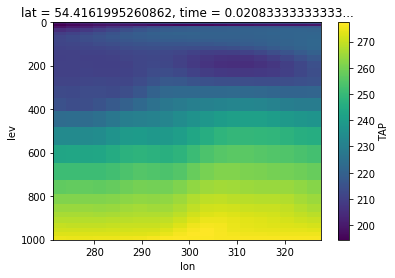

In [127]:
h1.TAP.isel(time=1, lat=crashlat, lon=slice(crashlon-10, crashlon+10)).plot(yincrease=False)

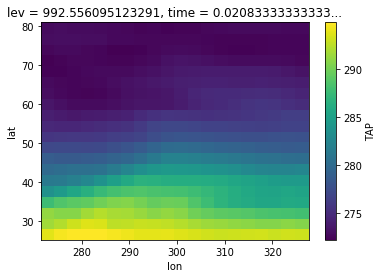

In [131]:
h1.TAP.isel(time=1, lev=29, lat=slice(crashlat-10, crashlat+10), lon=slice(crashlon-10, crashlon+10)).plot()

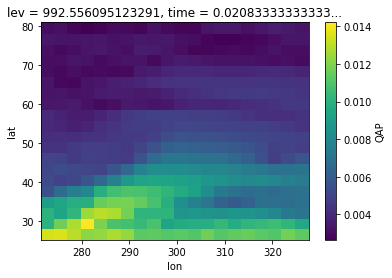

In [130]:
h1.QAP.isel(time=1, lev=29, lat=slice(crashlat-10, crashlat+10), lon=slice(crashlon-10, crashlon+10)).plot()

I cannot see anything obvious, but of course we should really investigate how this looks from the normalized viewpoint of the neural network.

## TODO: How random are the crashes

Test a newly trained network with fewer epochs.